In [ ]:
#@title Define if we are on Colab and mount drive { display-mode: "form" }
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
#@title Code for setting the environment, installation of packages { display-mode: "form" }

if IN_COLAB:
  %env PYTHONPATH=
  !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
  !chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
  !./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
  !conda install --channel defaults conda python=3.6 --yes -q
  !conda update --channel defaults --all --yes -q
  import sys
  sys.path.insert(0, "/usr/local/lib/python3.6/site-packages")

  # !pip install fastai pydicom kornia fastcore==1.0.9 --upgrade --quiet
  !conda config --add channels conda-forge
  !conda install -c fastai -c pytorch fastai fastcore=1.0.9 pydicom gdcm kornia scikit-image scikit-learn pandas numpy ipykernel --yes -q
  
  from getpass import getpass
  user = getpass('GitHub user')
  password = getpass('GitHub password')
  import os
  os.environ['GITHUB_AUTH'] = user + ':' + password
  !git clone https://$GITHUB_AUTH@github.com/lluissalord/radiology_ai.git

  %cd radiology_ai

In [ ]:
if IN_COLAB:
  PATH_DRIVER = '/content/gdrive/My Drive/'
  DATA_FOLDER = 'Dataset/'
else:
  PATH_DRIVER = ''
  DATA_FOLDER = 'data/'

In [1]:
import pandas as pd
import os

from fastai.basics import *
from fastai.medical.imaging import *

In [3]:
PATH_PREFIX = os.path.join(PATH_DRIVER, DATA_FOLDER, '')
raw_folder = PATH_PREFIX + 'DICOMS'
organize_folder = PATH_PREFIX + 'clasificacion_pendiente'
preprocess_folder = PATH_PREFIX + 'preprocess'

In [4]:
fnames = get_files(organize_folder, extensions='.dcm')
n_samples = 10 # None

1 frame per file
1 frame per file


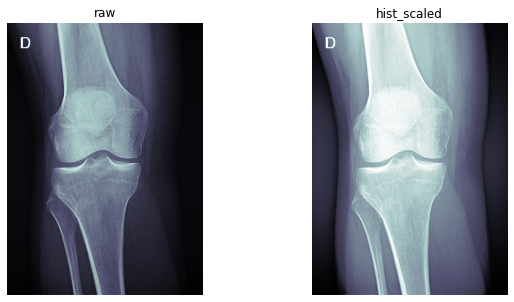

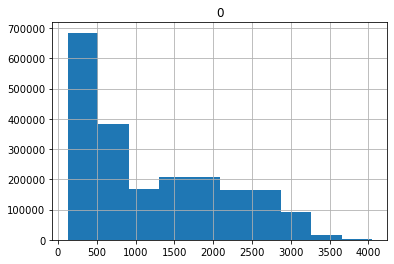

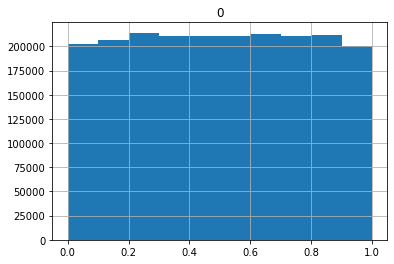

In [5]:
dcms = fnames[0:1].map(dcmread)
dcm = dcms[0]
scales = False, True
titles = 'raw','hist_scaled'
for s,a,t in zip(scales, subplots(1,2,imsize=5)[1].flat, titles):
    dcm.show(scale=s, ax=a, title=t);
pd.DataFrame(dcm.pixel_array.reshape(-1)).hist();
pd.DataFrame(dcm.hist_scaled().reshape(-1)).hist();

In [6]:
from preprocessing import DCMPreprocessDataset

dataset = DCMPreprocessDataset(fnames=fnames, padding_to_square=True, resize=None)
bins = dataset.init_bins(n_samples=n_samples)
# dataset.bins = bins

dataset.save(preprocess_folder)